# Titanic Competition (Top 1%)
https://www.kaggle.com/code/stefanschulmeister87/titanic-competition-top-1/notebook

## 1. Data Screening And Visualizations

In [1]:
# HTML stuff
from IPython.display import HTML
from IPython.display import display
# data structure
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import ShuffleSplit, RepeatedKFold, train_test_split, GridSearchCV, cross_val_score
# loading data
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combined_df = pd.concat([train_df, test_df])

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()
# Age, Cabin에 많은 결측치가 있으며 Fare에 1개의 결측치가 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# find categorical values
for col in train_df.columns:
    if (train_df[col].nunique() < 10):
        print(col,":",train_df[col].unique())

Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6]
Embarked : ['S' 'C' 'Q' nan]


In [7]:
# Unify visualization style

# color settings:
sns.set(rc={'axes.facecolor':'#EBE0BA',
            'figure.facecolor':'#E0D3AF',
            'grid.color':'#E0D3AF',
            'axes.edgecolor':'#424949',
            'axes.labelcolor':'#424949',
            'text.color':'#424949' # color for headlines and sub headlines
            })
# font size settings
sns.set_context(rc={'axes.labelsize':15})

# Times New Roman: (newspaper look)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

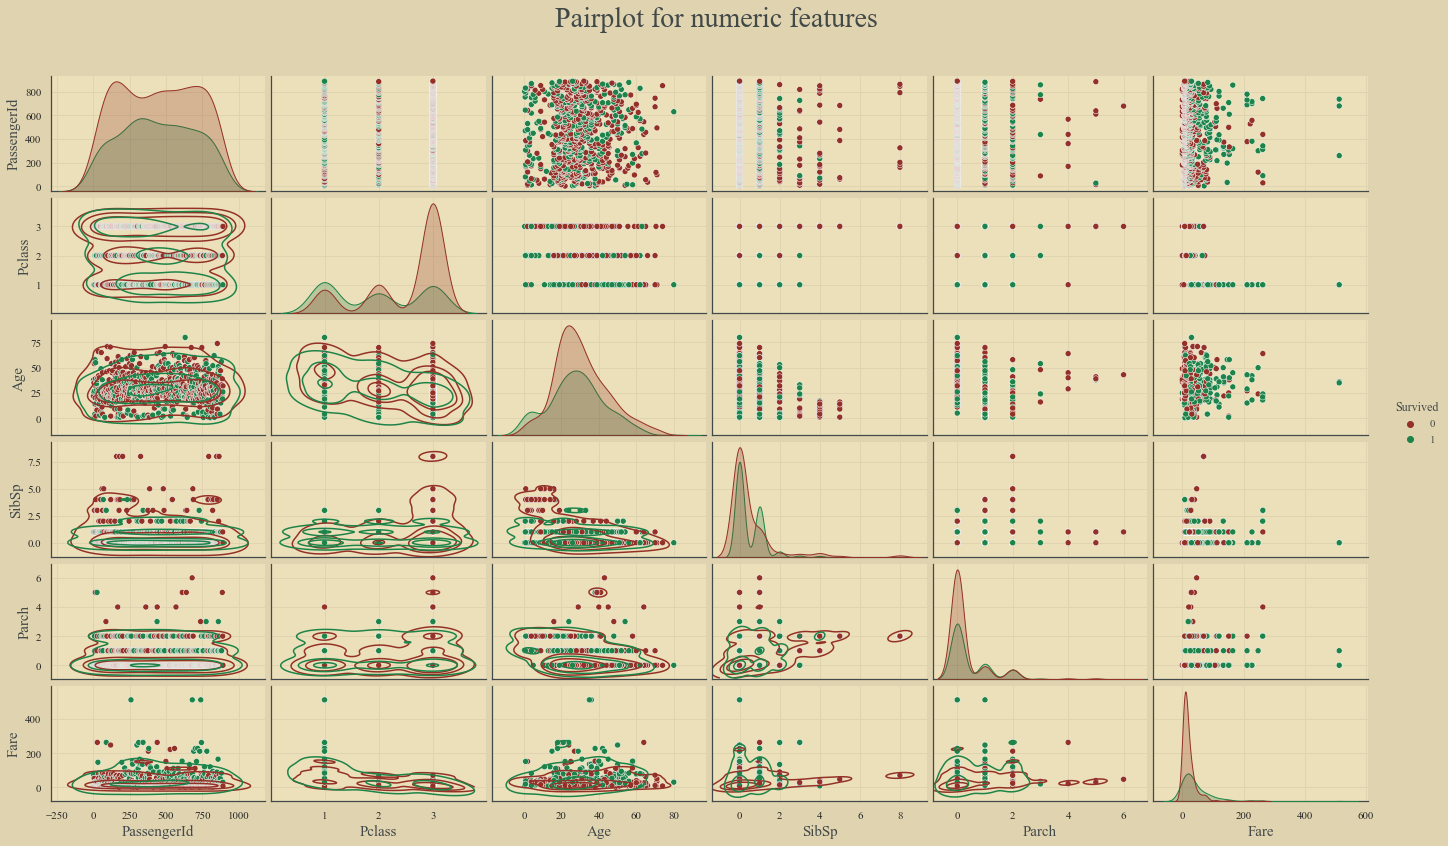

In [8]:
# Let us first take a general look at the numeric functions

survival_pal = {0: "#943126", 1:"#1D8348"}
screening_df = train_df.copy()
g = sns.pairplot(screening_df, hue="Survived", palette = survival_pal ,height=2, aspect=1.63)
g.map_lower(sns.kdeplot, levels=4, color="#424949")
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle("Pairplot for numeric features", fontsize="28");

In [9]:
# What was the overall chance to survive?
print('Overall probability to survive:', round(len(screening_df[screening_df['Survived']==1]) / len(screening_df), 3) * 100, '%')

Overall probability to survive: 38.4 %


Text(0.5, 0.98, 'Fare-Distribution for each class')

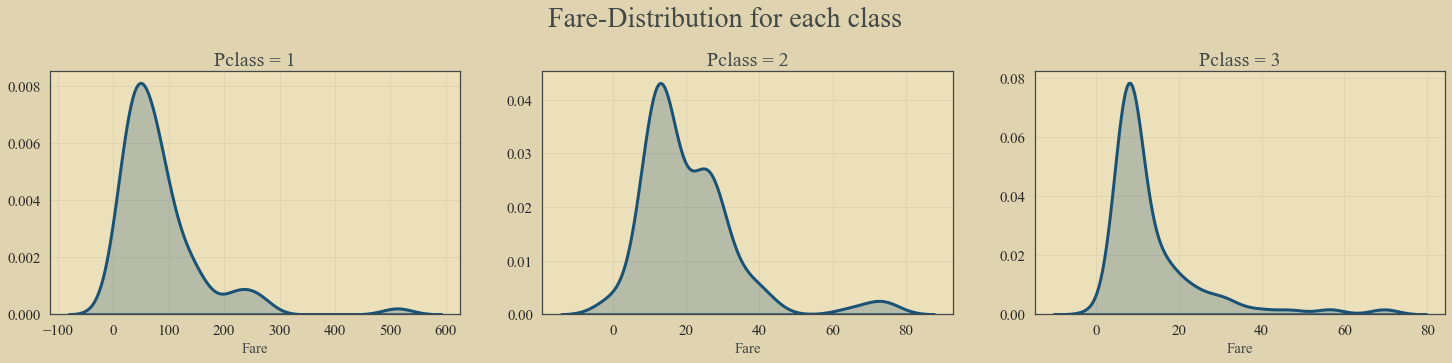

In [10]:
# What was the price range in the different classes?

# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust label fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x='Fare', color='#1A5276', fill=True, ax=ax0, linewidth=3).set(xlabel='Fare', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x='Fare', color='#1A5276', fill=True, ax=ax1, linewidth=3).set(xlabel='Fare', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x='Fare', color='#1A5276', fill=True, ax=ax2, linewidth=3).set(xlabel='Fare', ylabel='')

# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution for each class', fontsize='28')


Text(0.5, 0.98, 'Fare-Distribution for each class')

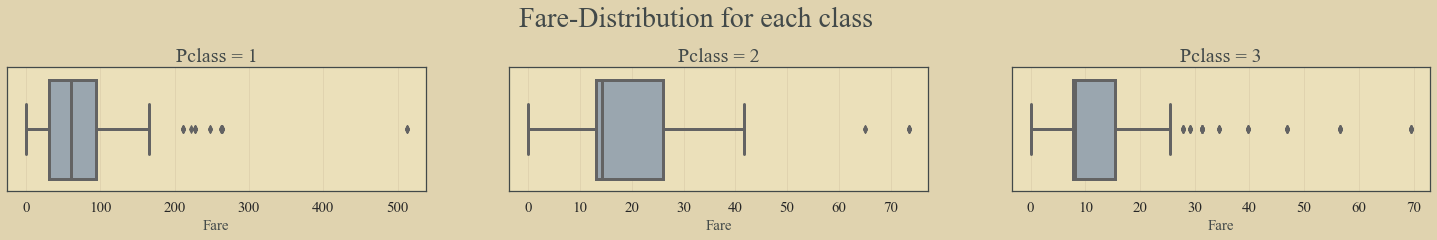

In [11]:
# boxplot for 2. look

# build figure
fig = plt.figure(figsize=(25.5, 3))

# add grid to figure
gs = fig.add_gridspec(1, 3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust label fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots
sns.boxplot(x='Fare', data=screening_df[screening_df['Pclass']==1], orient='h', color='#97A7B2', ax=ax0, linewidth=3, hue='Survived').set(xlabel='Fare')
sns.boxplot(x='Fare', data=screening_df[screening_df['Pclass']==2], orient='h', color='#97A7B2', ax=ax1, linewidth=3, hue='Survived').set(xlabel='Fare')
sns.boxplot(x='Fare', data=screening_df[screening_df['Pclass']==3], orient='h', color='#97A7B2', ax=ax2, linewidth=3, hue='Survived').set(xlabel='Fare')

# add headline
fig.subplots_adjust(top=0.7)
fig.suptitle('Fare-Distribution for each class', fontsize='28')


Text(0.5, 0.98, 'Age/Pclass and Survived')

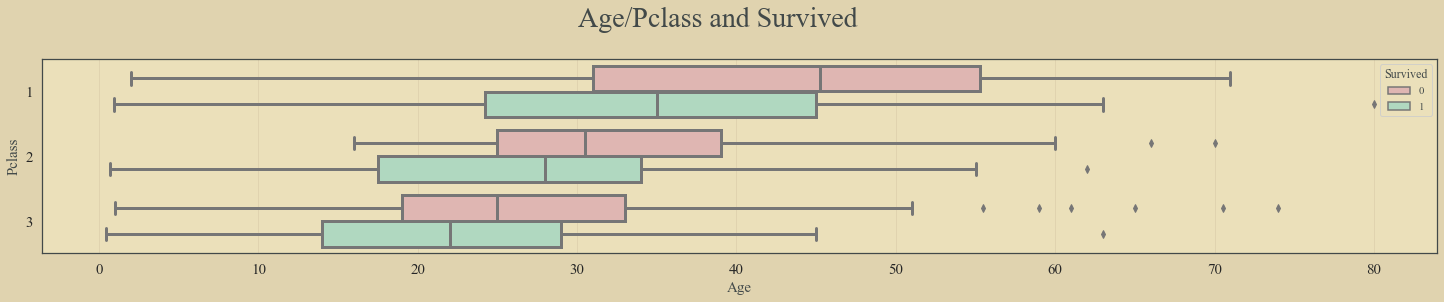

In [12]:
# What is the age distribution in each class and how is it related to the probability of survival?

fig = plt.figure(figsize=(25,4))
ax = sns.boxplot(x='Age', y='Pclass', hue='Survived', data=screening_df, orient='h', palette={0: '#E6B0AA', 1:"#A9DFBF"}, linewidth=3)
ax.tick_params(labelsize=15)
# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle('Age/Pclass and Survived', fontsize='28')

Text(0.5, 0.98, 'Age distribution per Pclass and Sex')

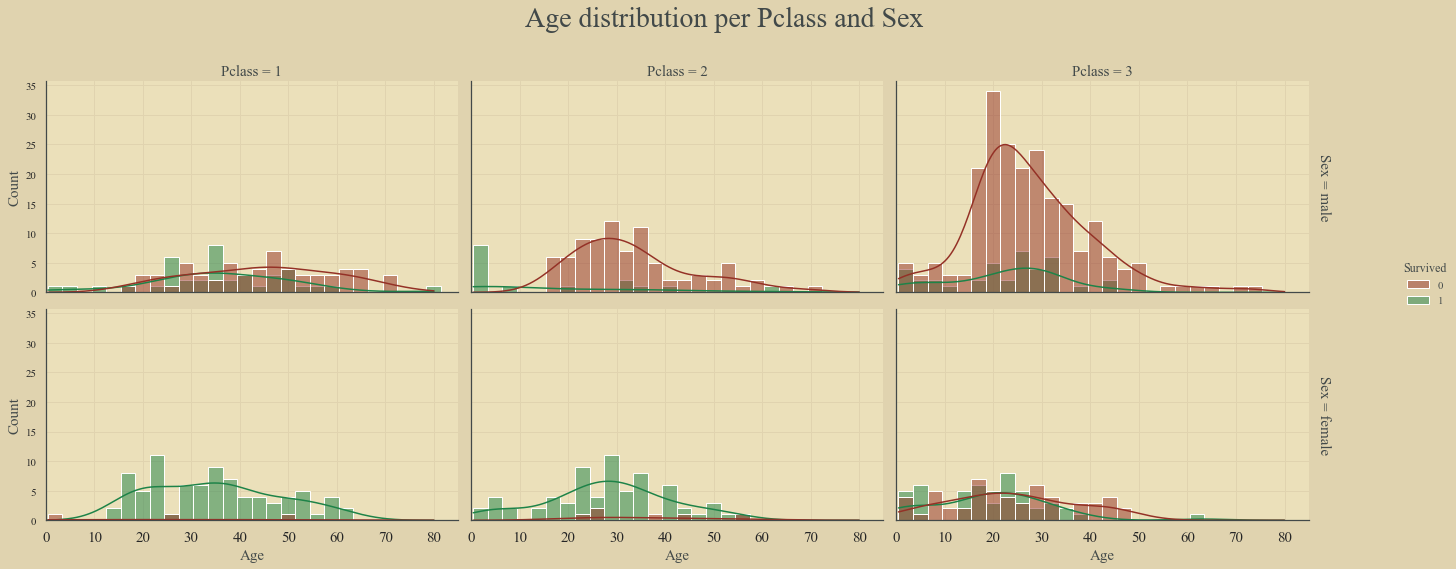

In [13]:
fg = sns.displot(screening_df, x='Age', col='Pclass', row='Sex', kde=True, palette=survival_pal, hue='Survived', binwidth=3, height=4, facet_kws=dict(margin_titles=True), aspect=1.63, linewidth=1)
fg.set_xticklabels(fontsize=15)
# change range for x axis
plt.xlim(0, 85)
# add headline
fg.fig.subplots_adjust(top=0.85)
fg.fig.suptitle('Age distribution per Pclass and Sex', fontsize='28')

In [14]:
# calculate the survival probability per class and sex
sex_class_prob_dict = {}
for n in ['male', 'female']:
    for m in [1, 2, 3]:
        df = screening_df[(screening_df['Pclass']==m)&(screening_df['Sex']==n)].copy()
        sex_class_prob_dict[f"{n} {str(m)}. class"] = round(len(df[df['Survived'] == 1]) / len(df['Survived']), 2)

# let's write a function for the probability visualization. we will need it later on.

def probability_visualization(prob_dict, title):
    df = pd.DataFrame.from_dict(prob_dict, orient='index').rename(columns={0:'survival_probability'})
    df['label'] = df.index
    fg = sns.catplot(data=df, kind='bar', y='label', x='survival_probability', height=5, color='#97A7B2', aspect=3.9, linewidth=3, ec='#424949')
    fg.set_xticklabels(fontsize=15)
    fg.set_yticklabels(fontsize=15)
    fg.fig.subplots_adjust(top=0.8)
    fg.fig.suptitle(title, fontsize='28')

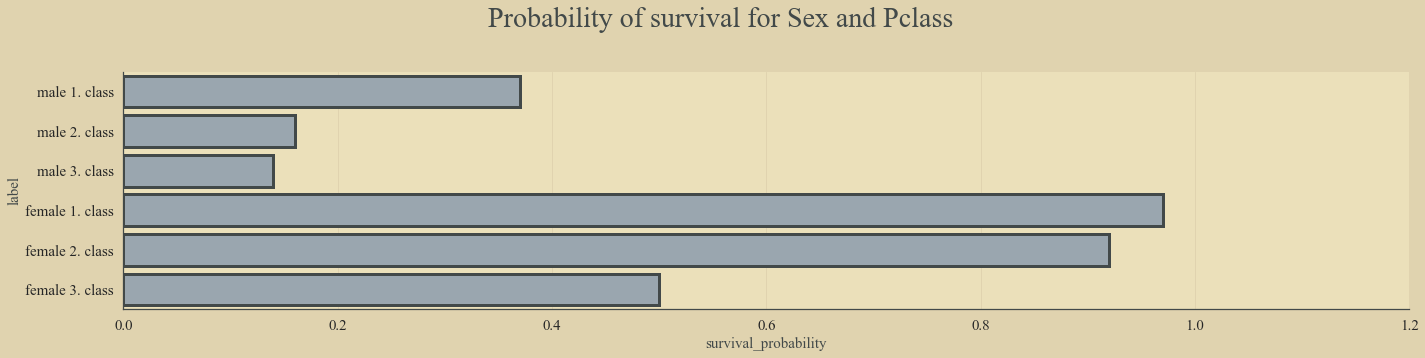

In [15]:
probability_visualization(prob_dict=sex_class_prob_dict, title='Probability of survival for Sex and Pclass')

In [16]:
sex_dict = {'male':0, 'female':1}
embarked_dict = {'S':1, 'C':2, 'Q':3}
screening_df = screening_df[screening_df['Embarked'].notnull()].copy()
screening_df.loc[:,'Sex'] = screening_df.loc[:,'Sex'].map(lambda x: sex_dict[x])
screening_df.loc[:, 'Embarked'] = screening_df.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])

Text(0.5, 1.0, 'Pairwise correlation')

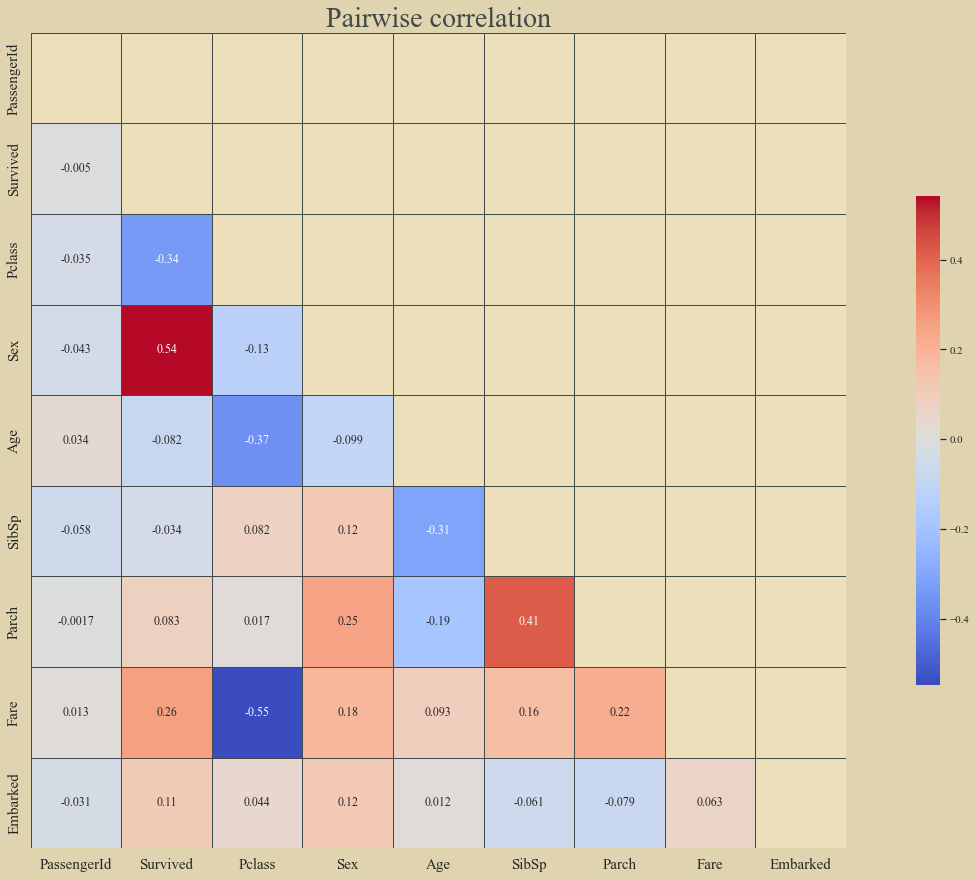

In [17]:
# calculate correlations:
corr = screening_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# build figure
f, ax = plt.subplots(figsize=(25,15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
# plot mast
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=1, linecolor='#424949', annot=True, cbar_kws={'shrink':0.6}).set_title('Pairwise correlation', fontsize='28')

## 2. Feature Engineering

In [18]:
# let's see if everyone has his own ticket.
combined_df['Ticket'].value_counts().nlargest(5)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: Ticket, dtype: int64

In [19]:
combined_df[combined_df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [20]:
# split Ticket into two parts and move all numbers to Ticket_number if there is no space (' ') included. (workaround)
# we continue using the screening_df since we want to have a look at the chance of survival in each group.

tmp_df = screening_df['Ticket'].str.split(' ', 1, expand=True).copy()
tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1]==tmp_df[0]] = 'no_prefix'
screening_df[['Ticket_prefix', 'Ticket_number']] = tmp_df

In [21]:
# top ten most common prefixes
screening_df['Ticket_prefix'].value_counts().nlargest(5)

no_prefix    663
PC            60
C.A.          27
STON/O        12
A/5           10
Name: Ticket_prefix, dtype: int64

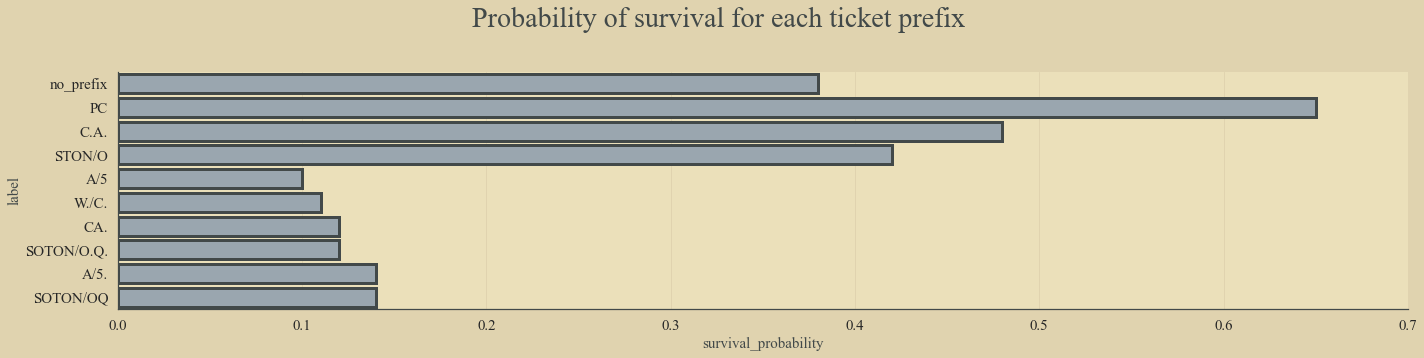

In [22]:
# calculate survival probability for each group of Ticket_prefix
prefix_prob_dict = {}
for n in ['no_prefix', 'PC', 'C.A.', 'STON/O', 'A/5', 'W./C.', 'CA.', 'SOTON/O.Q.', 'A/5.', 'SOTON/OQ']:
    df = screening_df[screening_df['Ticket_prefix'] == n].copy()
    prefix_prob_dict[n] = round(len(df[df['Survived']==1]) / len(df['Survived']), 2)

# plot probabilities
probability_visualization(prob_dict=prefix_prob_dict, title='Probability of survival for each ticket prefix')

In [23]:
screening_df['Leading_ticket_numbers'] = screening_df['Ticket_number'].map(lambda x : x[0:3])
screening_df['Leading_ticket_numbers'].value_counts().nlargest(5)

349    53
347    48
113    45
310    36
174    23
Name: Leading_ticket_numbers, dtype: int64

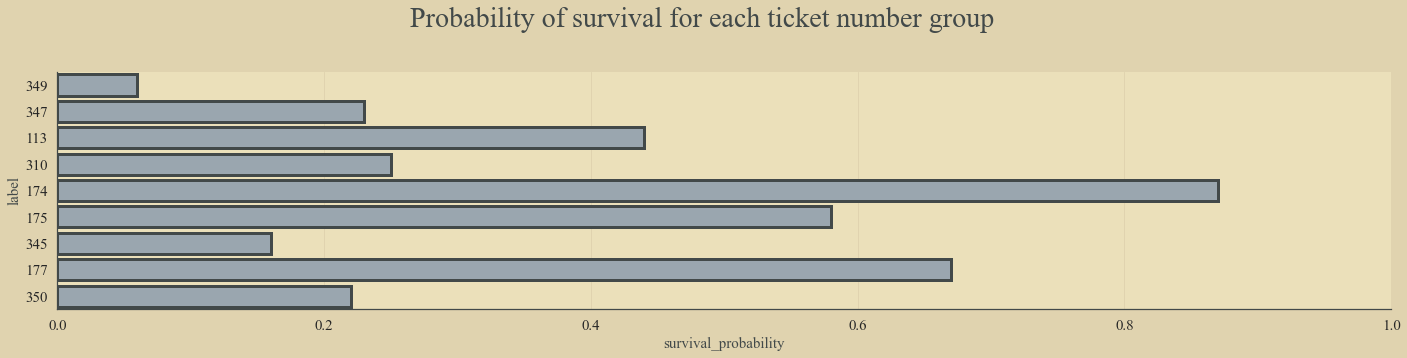

In [24]:
# Calculate survival probabilities for each group with more than 15 members:
number_groups = [x[0] for x in screening_df['Leading_ticket_numbers'].value_counts().items() if x[1] > 15]
group_prob_dict = {}
for n in number_groups:
    df = screening_df[screening_df['Leading_ticket_numbers'] == n].copy()
    group_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']), 2)
    
# plot probabilities
probability_visualization(prob_dict=group_prob_dict, title='Probability of survival for each ticket number group')

# ticket number의 첫째자리 수가 Pclass를 나타내는 것으로 보여짐

In [25]:
# We will use th combined_df for that
tmp_df = combined_df['Ticket'].str.split(' ', 1, expand=True).copy()
tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1] == tmp_df[0]] = 'no_prefix'
combined_df[['Ticket_prefix', 'Ticket_number']] = tmp_df
combined_df['Leading_ticket_numbers'] = combined_df['Ticket_number'].map(lambda x : x[0:3])
combined_df['First_ticket_numbers'] = combined_df['Ticket_number'].map(lambda x : x[0:1])
# combined_df.loc[:, 'Pclass'] = combined_df['Pclass'].astype('string')
print('Is there a relation between the first digit of the ticket number and the Pclass?')
print(95*'_')
for l in combined_df['First_ticket_numbers'].unique():
    df = combined_df[combined_df['First_ticket_numbers'] == l].copy()
    print(f"First_ticket_number {l}: # 1. class ticket {len(df[df['Pclass'] == 1])} / # 2. class ticket {len(df[df['Pclass'] == 2])} / # 3. class ticket {len(df[df['Pclass'] == 3])}")
    

Is there a relation between the first digit of the ticket number and the Pclass?
_______________________________________________________________________________________________
First_ticket_number 2: # 1. class ticket 8 / # 2. class ticket 205 / # 3. class ticket 151
First_ticket_number 1: # 1. class ticket 288 / # 2. class ticket 32 / # 3. class ticket 22
First_ticket_number 3: # 1. class ticket 18 / # 2. class ticket 37 / # 3. class ticket 461
First_ticket_number 9: # 1. class ticket 0 / # 2. class ticket 0 / # 3. class ticket 5
First_ticket_number 7: # 1. class ticket 0 / # 2. class ticket 2 / # 3. class ticket 18
First_ticket_number 6: # 1. class ticket 4 / # 2. class ticket 0 / # 3. class ticket 17
First_ticket_number 5: # 1. class ticket 5 / # 2. class ticket 0 / # 3. class ticket 4
First_ticket_number 4: # 1. class ticket 0 / # 2. class ticket 0 / # 3. class ticket 22
First_ticket_number 8: # 1. class ticket 0 / # 2. class ticket 0 / # 3. class ticket 5
First_ticket_number L: # 

In [26]:
print('How many passengers are in groups of a certain sizes?')
print(55*'_')
for g in [0, 1, 2, 3, 4, 5, 10, 15, 20]:
    list_of_groups = [x[1] for x in combined_df['Leading_ticket_numbers'].value_counts().items() if x[1] > g]
    print(f'min group size {g+1}: includes {sum(list_of_groups)} / {len(combined_df)} (# groups: {len(list_of_groups)})')    

How many passengers are in groups of a certain sizes?
_______________________________________________________
min group size 1: includes 1309 / 1309 (# groups: 191)
min group size 2: includes 1255 / 1309 (# groups: 137)
min group size 3: includes 1201 / 1309 (# groups: 110)
min group size 4: includes 1132 / 1309 (# groups: 87)
min group size 5: includes 1072 / 1309 (# groups: 72)
min group size 6: includes 1002 / 1309 (# groups: 58)
min group size 11: includes 828 / 1309 (# groups: 36)
min group size 16: includes 645 / 1309 (# groups: 22)
min group size 21: includes 466 / 1309 (# groups: 12)


In [27]:
# add fare per person and group size: (excluding child discounts)
screening_df['Fare_per_person'] = 0
screening_df['Group_size'] = 0
for index, row in screening_df.iterrows():
    # using the combined_df for group size
    group_size = combined_df['Ticket'].value_counts()[row['Ticket']]
    screening_df.at[index, 'Fare_per_person'] = row['Fare'] / group_size
    screening_df.at[index, 'Group_size'] = group_size

Text(0.5, 0.98, 'Fare-Distribution compared to Fare_per_person-Distribution for each class')

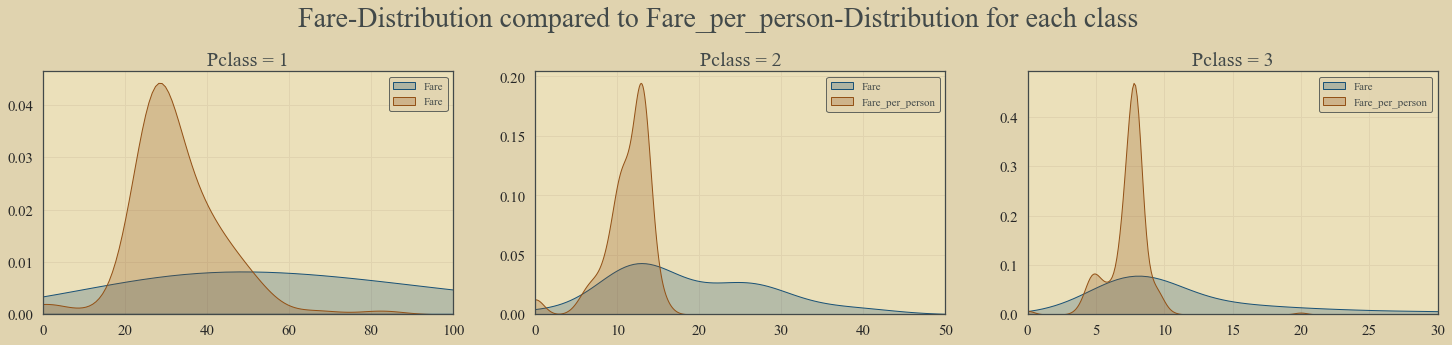

In [28]:
# Let's take a look at the Fare_per_person distribution.

# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1, 3)

# add subplots to grid:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# set title for each subplot:
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)
# change labelsize for each axis:
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# set limits for x axis:
ax0.set_xlim(0,100)
ax1.set_xlim(0,50)
ax2.set_xlim(0,30)

# plot:
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x='Fare', color='#1A5276', fill=True, ax=ax0, label='Fare').set(xlabel='Fare', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x='Fare_per_person', color='#935116', fill=True, ax=ax0, label='Fare').set(xlabel='', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x='Fare', color='#1A5276', fill=True, ax=ax1, label='Fare').set(xlabel='Fare', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x='Fare_per_person', color='#935116', fill=True, ax=ax1, label='Fare_per_person').set(xlabel='', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x='Fare', color='#1A5276', fill=True, ax=ax2, label='Fare').set(xlabel='Fare', ylabel='')
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x='Fare_per_person', color='#935116', fill=True, ax=ax2, label='Fare_per_person').set(xlabel='', ylabel='')

# add legend:
ax0.legend(facecolor='#E0D3AF', edgecolor='#424949')
ax1.legend(facecolor='#E0D3AF', edgecolor='#424949')
ax2.legend(facecolor='#E0D3AF', edgecolor='#424949')

# add headline:
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution compared to Fare_per_person-Distribution for each class', fontsize='28', color='#424949')


Text(0.5, 0.98, 'Group_size vs Survived in each Pclass')

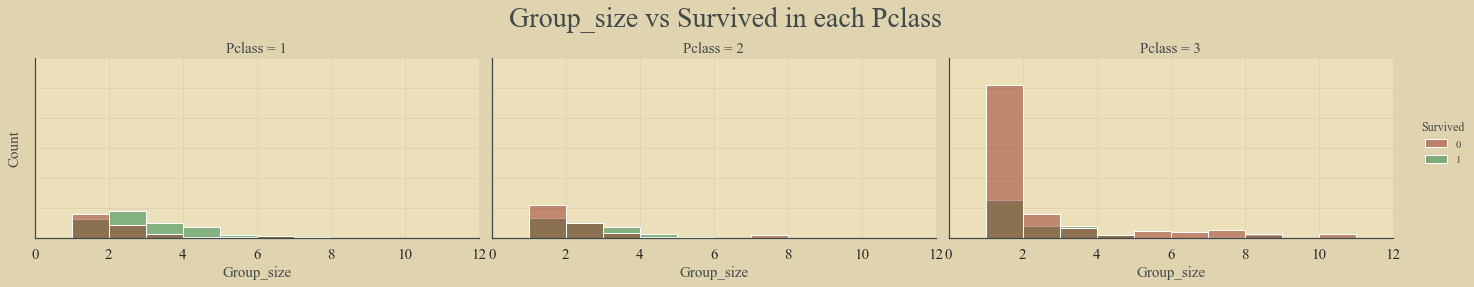

In [29]:
# What about the Group_size distribution for each class?

fg = sns.displot(data=screening_df, x='Group_size', col='Pclass', palette=survival_pal, hue='Survived', binwidth=1, height=4, aspect=1.67)

# set label size for x and y labels
fg.set_xticklabels(fontsize=15)
fg.set_yticklabels(fontsize=15)

# add headline
fg.fig.subplots_adjust(top=0.8)
fg.fig.suptitle('Group_size vs Survived in each Pclass', fontsize='28', color='#424949')

In [30]:
# Before we plot the correlations again, we need to make sure that all the columns we want to inspect are numeric.
# Since we want to examine our new feature "Leading_TicketNumber", we have to find suitable values for all non-convertible string values.

# We are now looking for suitable integer values...
# What about the class in these groups?

# Let's adjust the values and cast Leading_ticket_number.
screening_df.loc[screening_df['Leading_ticket_numbers'] == '2. ', 'Leading_ticket_numbers'] = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] == 'LIN', 'Leading_ticket_numbers'] = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] == 'Bas', 'Leading_ticket_numbers'] = 201

# cast Leading_ticket_number to int:
screening_df['Leading_ticket_numbers'] = screening_df['Leading_ticket_numbers'].astype(int)
# works...



In [31]:
# building feature
screening_df.loc[screening_df['Age'] <= 9, 'Child'] = 1
screening_df.loc[screening_df['Age'] > 9, 'Child'] = 0

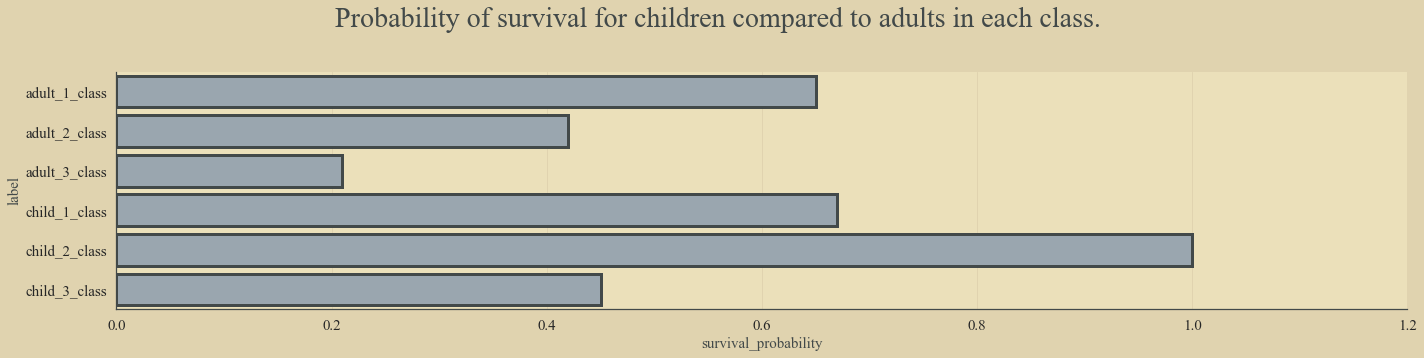

In [32]:
# calculate probabilities for survival
child_prob_dict = {}
for n in [0, 1]:
    for p in [1, 2, 3]:
        df = screening_df[(screening_df['Child'] == n) & (screening_df['Pclass'] == p)].copy()
        if n == 1:
            dict_key = f"child_{p}_class"
        else:
            dict_key = f"adult_{p}_class"
        child_prob_dict[dict_key] = round(len(df[df['Survived'] == 1]) / len(df['Survived']), 2)

# plot probabilities
probability_visualization(prob_dict=child_prob_dict, title='Probability of survival for children compared to adults in each class.')

Text(0.5, 1.0, 'Pairwise correlation')

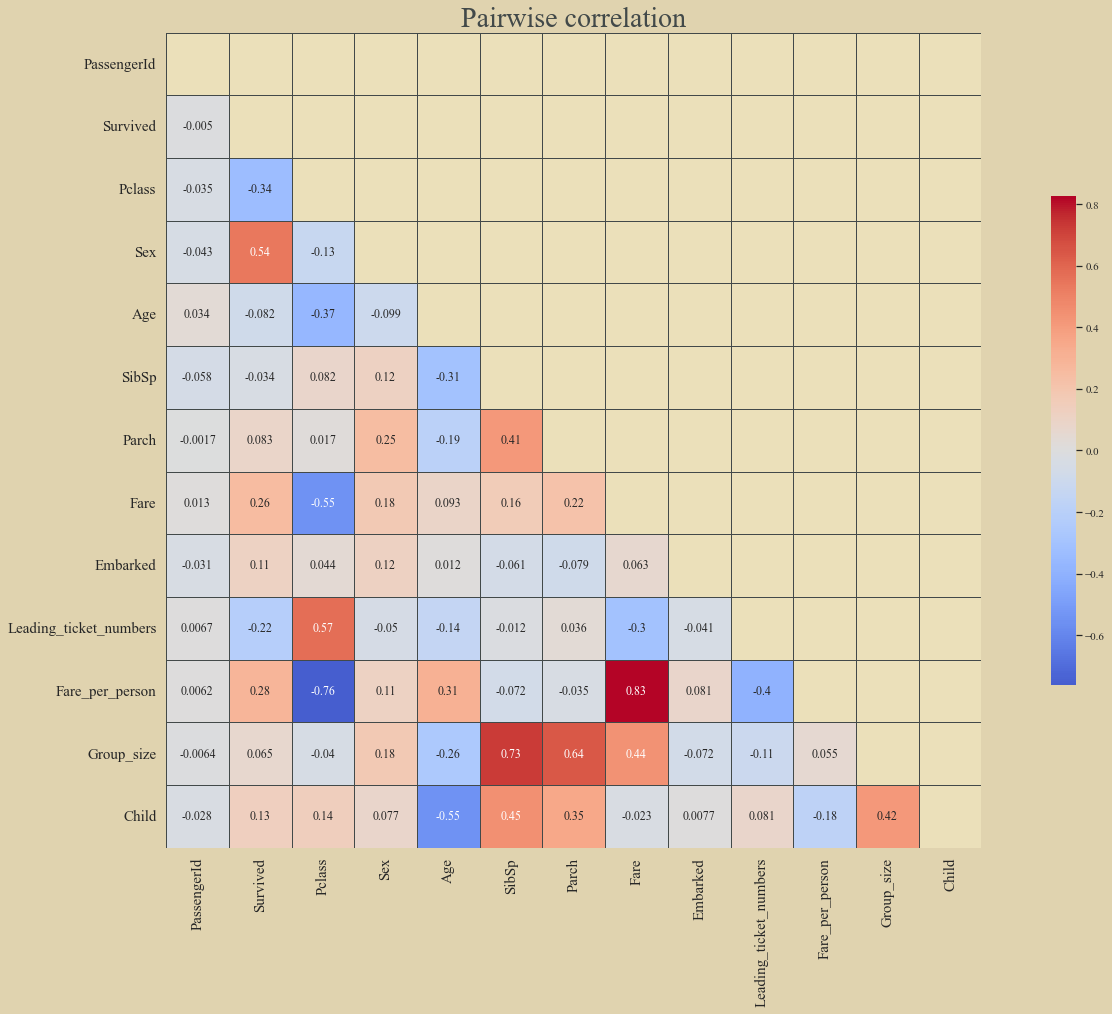

In [33]:
# calculate correlations:
corr_2 = screening_df.corr()

mask = np.triu(np.ones_like(corr_2, dtype=bool))

# build figure
f, ax = plt.subplots(figsize=(25,15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
# plot mast
sns.heatmap(corr_2, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=1, linecolor='#424949', annot=True, cbar_kws={'shrink':0.6}).set_title('Pairwise correlation', fontsize='28')

## 3. Data Preparation Using Pipe

In [45]:
def copy_df(df):
    return df.copy()

def fill_age(df):
    df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
    return df

def drop_missing_embarked_rows(df):
    return df[df['Embarked'].notnull()]

def fill_fare(df):
    df.loc[:, 'Fare'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean()))
    return df

def drop_columns(df, columns):
    df.drop(columns=columns, inplace=True)
    return df

def add_leading_ticket_number_feature(df):
    tmp_df = df['Ticket'].str.split(' ', 1, expand=True).copy()
    tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
    tmp_df['Leading_ticket_numbers'] = tmp_df[1].map(lambda x : x[0:3])
    df['Leading_ticket_numbers'] = tmp_df['Leading_ticket_numbers'].copy()
    return df

def cast_leading_ticket_number_to_int(df):
    df.loc[df['Leading_ticket_numbers'] =='2. ', 'Leading_ticket_numbers'] = 301
    df.loc[df['Leading_ticket_numbers'] =='LIN', 'Leading_ticket_numbers'] = 301
    df.loc[df['Leading_ticket_numbers'] =='Bas', 'Leading_ticket_numbers'] = 201
    df['Leading_ticket_numbers'] = df['Leading_ticket_numbers'].astype(int)
    return df

def add_group_size_feature(df):
    df['Group_size'] = 0
    for index, row in df.iterrows():
        df.at[index, 'Group_size'] = combined_df['Ticket'].value_counts()[row['Ticket']]
    return df

def add_fare_per_person_feature(df):
    df['Fare_per_person'] = 0
    for index, row in df.iterrows():
        df.at[index, 'Fare_per_person'] = row['Fare'] / combined_df['Ticket'].value_counts()[row['Ticket']]
    return df

def add_child_feature(df):
    df.loc[df['Age'] <= 9, 'Child'] = 1
    df.loc[df['Age'] > 9, 'Child'] = 0
    df['Child'] = df['Child'].astype(int)
    return df

def one_hot_encoding(df, column):
    # Get one hot encoding of columns B
    one_hot_df = pd.get_dummies(df[column])
    # Drop input column as it is now encoded
    df = df.drop(column, axis=1)
    # Join the encoded df
    df = df.join(one_hot_df)
    return df

def norm_col(df, column):
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

def pipeline(df):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_child_feature)
          .pipe(add_leading_ticket_number_feature)
          .pipe(cast_leading_ticket_number_to_int)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Sex")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(norm_col, "Age")
          .pipe(norm_col, "Fare_per_person")
          .pipe(norm_col, "Leading_ticket_numbers")
          .pipe(norm_col, "Group_size")
          .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Fare']))
    return df

In [46]:
# leet's have a look...
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [47]:
pipeline(train_df).head()

/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5

,Survived,Age,Parch,Group_size,Fare_per_person,Child,Leading_ticket_numbers,1,2,3,female,male,C,Q,S
0,0,-0.548944,0,-0.623507,-0.535136,0,-0.587229,0,0,1,0,1,0,0,1
1,1,0.658835,0,-0.067541,1.562287,0,-0.863965,1,0,0,1,0,1,0,0
2,1,-0.247000,0,-0.623507,-0.485271,0,0.173794,0,0,1,1,0,0,0,1
3,1,0.432376,0,-0.067541,0.890645,0,-1.340565,1,0,0,1,0,0,0,1
4,0,0.432376,0,-0.623507,-0.476036,0,0.658082,0,0,1,0,1,0,0,1


## 4. Model Training And Validation

In [48]:
X_y = pipeline(train_df)
y = X_y['Survived'].copy()
X = drop_columns(X_y, 'Survived')
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5

In [51]:
print('probability for survival in y_train:')
print(y_train.value_counts(normalize=True))
print('probability for survival in y_test:')
print(y_test.value_counts(normalize=True))

probability for survival in y_train:
0    0.617117
1    0.382883
Name: Survived, dtype: float64
probability for survival in y_test:
0    0.618834
1    0.381166
Name: Survived, dtype: float64


In [55]:
# build model
gbc = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01, max_depth=3, verbose=0, random_state=1)
# train model
gbc.fit(X_train, y_train)
print('Performance on train data:', gbc.score(X_train, y_train))
print('Performance on test data:', gbc.score(X_test, y_test))

/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Performance on train data: 0.954954954954955
Performance on test data: 0.8475336322869955


/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
def feature_importancy_plot(model, data):
    feat_imp = pd.Series(model.feature_importances_, data.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(25,5))
    ax = feat_imp.plot(kind='bar', color='#97A7B2', linewidth=3, ec='#424949')
    ax.tick_params(labelrotation=45, axis='x')
    ax.tick_params(labelcolor='#424949', labelsize=15, axis='both')
    fig.subplots_adjust(top=0.8)
    fig.suptitle('Feature Importances', fontsize='28', color='#424949')
    plt.ylabel('Feature Importance Score', color='#424949')
    plt.xlabel('Features', color='#424949')

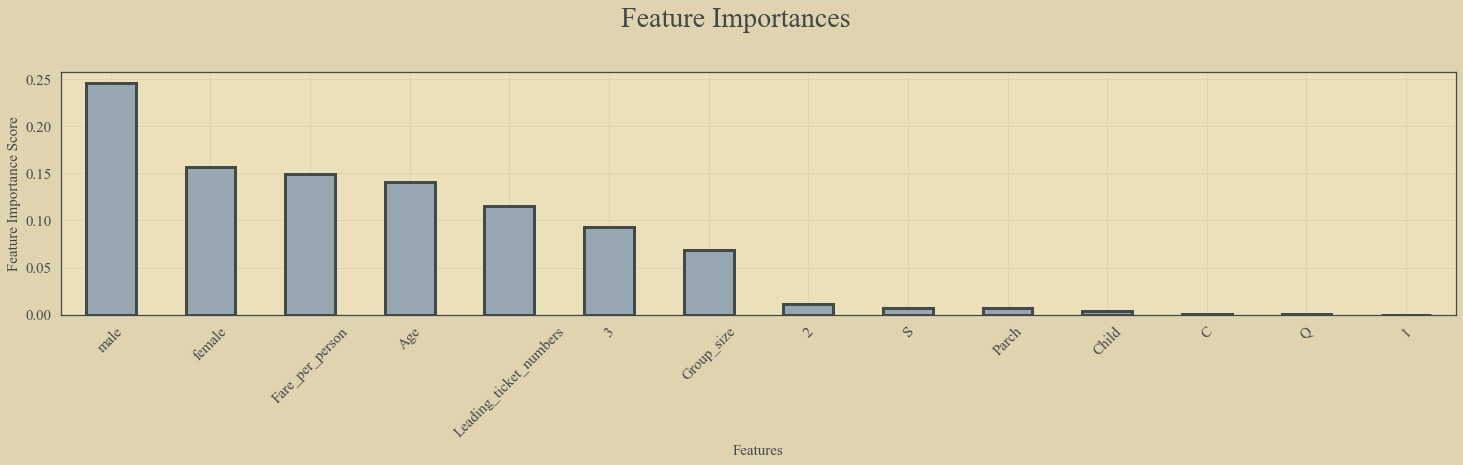

In [67]:
feature_importancy_plot(model=gbc, data=X_train)

In [68]:
param_test = {'max_depth':range(3,21,2),
              'min_samples_split':range(10,51,5),
              'subsample':[0.7, 0.8, 0.9, 1.0]}

gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                            n_estimators=500,
                                                            max_features='sqrt',
                                                            random_state=1), param_grid = param_test, scoring='roc_auc', n_jobs=4, cv=5) # TODO scoring='roc_auc', n_jobs=4, cv=5, max_features='sqrt' 등등 모르겠음

# This takes around 20 mins on the kaggle kernel.
# gsearch.fit(X,y)
#gsearch.best_params_, gsearch.best_score_

# here is the result:
print("({'max_depth': 13, 'min_samples_split': 10, 'subsample': 0.9}, 0.8905325516361675)")

({'max_depth': 13, 'min_samples_split': 10, 'subsample': 0.9}, 0.8905325516361675)


In [69]:
gbc2 = GradientBoostingClassifier(n_estimators=500,
                                  learning_rate=0.01,
                                  max_depth=13,
                                  verbose=0,
                                  min_samples_split=10,
                                  subsample=0.9,
                                  max_features='sqrt')
gbc2.fit(X_train, y_train)
print('Performance on train data:', gbc2.score(X_train,y_train))
print('Performance on test data:', gbc2.score(X_test,y_test))

/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Performance on train data: 0.990990990990991
Performance on test data: 0.8430493273542601


/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/gello/.local/share/virtualenvs/Kaggle-grAO6nOw/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


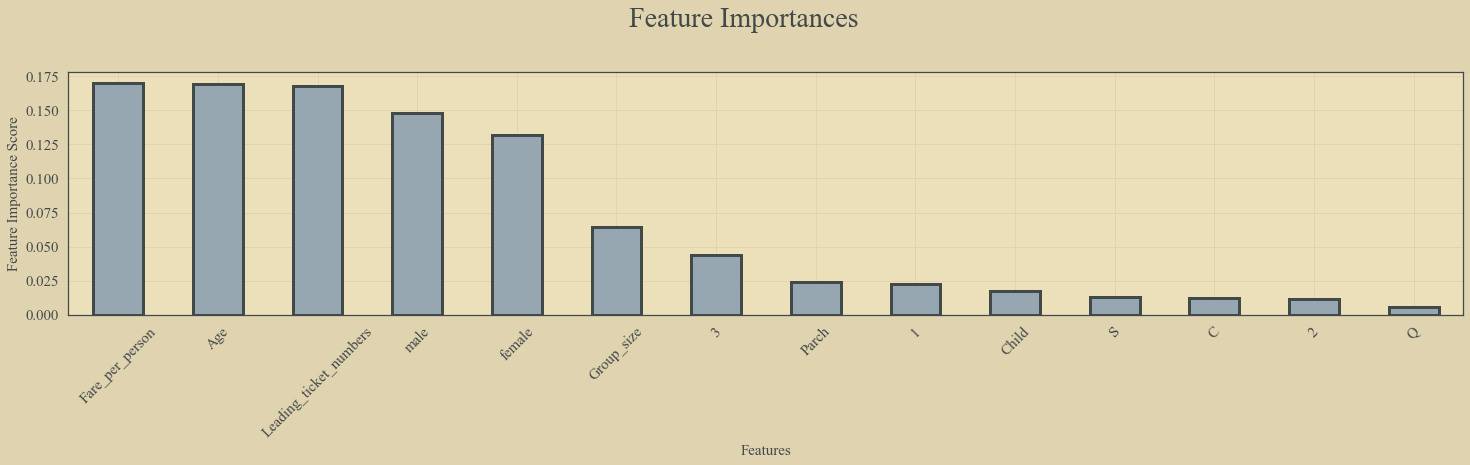

In [70]:
feature_importancy_plot(model=gbc2, data=X_train)

In [71]:
X_submission = pipeline(test_df)
gbc_prediction = gbc2.predict(X_submission)
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':gbc_prediction})

/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df.loc[:, 'Age'] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) # TODO lambda x: x.fillna(x.mean()) 여기서 x.mean()은 무엇의 평균을 나타내는건지?
/var/folders/k9/95tjrxrs7hn4_c78t6qvqkmh0000gn/T/ipykernel_84396/2399579219.py:5

In [72]:
submission.to_csv('submission.csv', index=False)
print('Submission complete')

Submission complete
